In [1]:
import pandas as pd

#Training set
pizza = {'diameter' : [6,8,10,14,18],
         'n_topping' : [2,1,0,2,0],
         'harga' : [7,9,13,17.5,18]}


train_df_pizza = pd.DataFrame(pizza)
print(train_df_pizza)


   diameter  n_topping  harga
0         6          2    7.0
1         8          1    9.0
2        10          0   13.0
3        14          2   17.5
4        18          0   18.0


In [2]:
# testing set

pizza = {'diameter' : [8,9,11,16,12],
         'n_topping' : [2,0,2,2,0],
         'harga' : [11, 8.5, 15, 18, 11]}


test_df_pizza = pd.DataFrame(pizza)
print(test_df_pizza)


   diameter  n_topping  harga
0         8          2   11.0
1         9          0    8.5
2        11          2   15.0
3        16          2   18.0
4        12          0   11.0


In [3]:

#PREPROCESSING DATASET

import numpy as np

x_train = np.array(train_df_pizza[['diameter','n_topping']])
y_train = np.array(train_df_pizza['harga'])

X_test = np.array(test_df_pizza[['diameter','n_topping']])
y_test = np.array(test_df_pizza['harga'])

In [6]:
#MULTIPLE LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)

print("r2_score = ", r2_score(y_test,y_pred))


[10.0625     10.28125    13.09375    18.14583333 13.3125    ]
r2_score =  0.7701677731318468


In [11]:

#POLYNOMIAL REGRESSION

#PREPROCESSING DATASET

x_train = np.array(train_df_pizza[['diameter']])
y_train = np.array(train_df_pizza['harga'])


In [12]:
#POLYNOMIAL REGRESSION : QUADRATIC

from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train) #pengubahan bentuk features menjadi bentuk polynomial features

print(x_train_quadratic)

[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


In [10]:
#Training model
model = LinearRegression()
model.fit(x_train_quadratic,y_train)

LinearRegression()

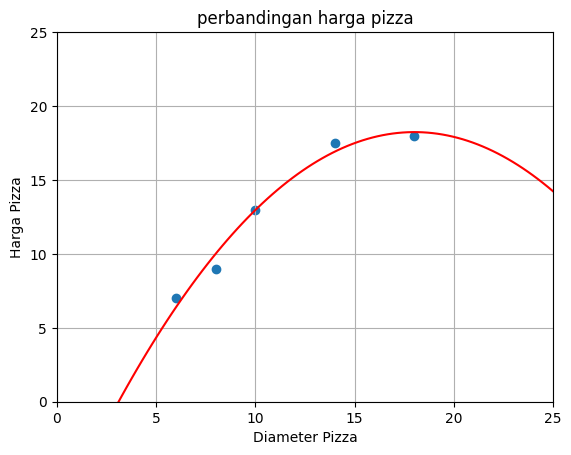

In [19]:
#memvisualisasikan model
import numpy as np
import matplotlib.pyplot as plt

x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis, color='red')

plt.title('perbandingan harga pizza')
plt.xlabel('Diameter Pizza')
plt.ylabel('Harga Pizza')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid()
plt.show()


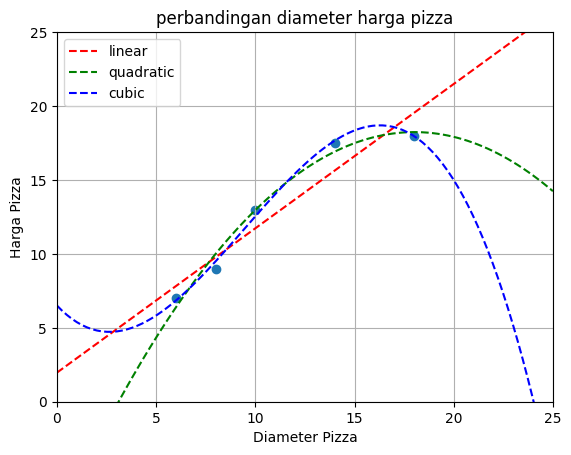

In [30]:
# perbandingan antara linear, quadratic, cubic

#trining set
plt.scatter(x_train, y_train)

#Linear
model = LinearRegression()
model.fit(x_train, y_train)
x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label = 'linear')

#quadratic
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis, '--g', label = 'quadratic')

#cubic
cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_cubic, y_train)
x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis, '--b', label = 'cubic')

plt.title('perbandingan diameter harga pizza')
plt.xlabel('Diameter Pizza')
plt.ylabel('Harga Pizza')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid()
plt.legend()
plt.show()
